In [ ]:
#Vamos utilizar um Código de Raspagem para nossa base analitica
#Este script Python realiza a raspagem dos links da página e salva os dados em um arquivo CSV.
import requests
from bs4 import BeautifulSoup
import pandas as pd
from urllib.parse import urljoin

# URL do site
url = "https://www.gov.br/saude/pt-br/assuntos/saude-de-a-a-z/a/arboviroses/informe-semanal/informe-semanal-no-02-coe"

# Requisitar a página
try:
    response = requests.get(url)
    response.raise_for_status()  # Verifica se a requisição foi bem-sucedida
except requests.RequestException as e:
    print(f"Erro ao requisitar a página: {e}")
    exit()

# Parsear o conteúdo da página
soup = BeautifulSoup(response.text, 'html.parser')

# Exemplo: Extrair links para relatórios ou outras informações úteis
links = soup.find_all('a', href=True)
data = []

for link in links:
    href = link['href']
    text = link.get_text(strip=True)
    if 'pdf' in href.lower():  # Supondo que os relatórios sejam PDFs
        # Criar URLs absolutas se necessário
        href = urljoin(url, href)
        data.append({
            'Texto': text,
            'URL': href
        })

# Criar um DataFrame com os dados
df = pd.DataFrame(data)

# Salvar os dados em um arquivo CSV
df.to_csv('dados_arbo_virais.csv', index=False)

print("Dados raspados e salvos em dados_arbo_virais.csv")


Dados raspados e salvos em dados_arbo_virais.csv


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from urllib.parse import urljoin

# URL do site
url = "https://www.gov.br/saude/pt-br/assuntos/saude-de-a-a-z/a/arboviroses/informe-semanal/informe-semanal-no-02-coe"

# Requisitar a página
try:
    response = requests.get(url)
    response.raise_for_status()  # Verifica se a requisição foi bem-sucedida
except requests.RequestException as e:
    print(f"Erro ao requisitar a página: {e}")
    exit()

# Parsear o conteúdo da página
soup = BeautifulSoup(response.text, 'html.parser')

# Extrair links para relatórios ou outras informações úteis
links = soup.find_all('a', href=True)
data_links = []

for link in links:
    href = link['href']
    text = link.get_text(strip=True)
    if 'pdf' in href.lower():  # Supondo que os relatórios sejam PDFs
        # Criar URLs absolutas se necessário
        href = urljoin(url, href)
        data_links.append({
            'Texto': text,
            'URL': href
        })

# Criar um DataFrame com os dados de links
df_links = pd.DataFrame(data_links)

# Dados adicionais
data_additional = {
    'Região/UF': ['Centro-Oeste', 'Distrito Federal', 'Goiás', 'Mato Grosso', 'Mato Grosso do Sul',
                  'Nordeste', 'Alagoas', 'Bahia', 'Ceará', 'Maranhão', 'Paraíba', 'Pernambuco',
                  'Piauí', 'Rio Grande do Norte', 'Sergipe', 'Norte', 'Acre', 'Amapá', 'Amazonas',
                  'Pará', 'Rondônia', 'Roraima', 'Tocantins', 'Sudeste', 'Espírito Santo', 'Minas Gerais',
                  'Rio de Janeiro', 'São Paulo', 'Sul', 'Paraná', 'Rio Grande do Sul', 'Santa Catarina'],
    'Casos prováveis 2023': [29142, 5164, 12238, 5082, 6658, 13154, 341, 7129, 1425, 898, 769, 707,
                             715, 813, 357, 9816, 1180, 123, 1508, 1437, 4834, 17, 717, 104916,
                             19486, 45035, 3480, 36915, 8811, 6795, 355, 1661],
    'Coeficiente de incidência 2023': [174.4, 166.9, 169.8, 142.5, 234.5, 22.8, 10.1, 47.6, 15.4, 12.6, 18.9, 7.3,
                                       21.7, 22.8, 15.3, 51.9, 130.1, 14.0, 35.3, 16.4, 266.3, 2.6, 44.6, 117.1,
                                       474.3, 210.3, 19.9, 79.1, 29.0, 58.6, 3.1, 22.6],
    'Casos prováveis 2024': [131893, 80979, 42407, 5166, 3341, 16691, 421, 9539, 1368, 425, 771, 1444,
                             791, 1369, 563, 18472, 5822, 1101, 6671, 2147, 1122, 155, 1454, 423142,
                             21356, 232683, 51532, 117571, 98263, 72526, 8612, 17125],
    'Coeficiente de incidência 2024': [809.8, 2874.6, 601.1, 141.2, 121.2, 30.5, 13.5, 67.5, 15.6, 6.3, 19.4, 15.9,
                                       24.2, 41.5, 25.5, 106.5, 701.4, 150.1, 169.3, 26.5, 71.0, 24.4, 96.2, 498.7,
                                       557.1, 1132.9, 321.0, 264.7, 328.3, 633.8, 79.2, 225.0]
}

# Criar um DataFrame com os dados adicionais
df_additional = pd.DataFrame(data_additional)

# Salvar os dados em arquivos CSV
df_links.to_csv('dados_arbo_virais_links.csv', index=False)
df_additional.to_csv('dados_arbo_virais_adicionais.csv', index=False)

print("Dados raspados e salvos em dados_arbo_virais_links.csv e dados_arbo_virais_adicionais.csv")


Dados raspados e salvos em dados_arbo_virais_links.csv e dados_arbo_virais_adicionais.csv


Vamos construir um gráfico com os dados fornecidos. Vou criar um gráfico de linhas que mostra a evolução dos casos prováveis e coeficientes de incidência para cada região/UF ao longo dos anos (2023 e 2024). Para isso, usaremos a biblioteca matplotlib para visualização.

<ipython-input-3-3b7c6487394c>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_additional['Região/UF'], rotation=90)


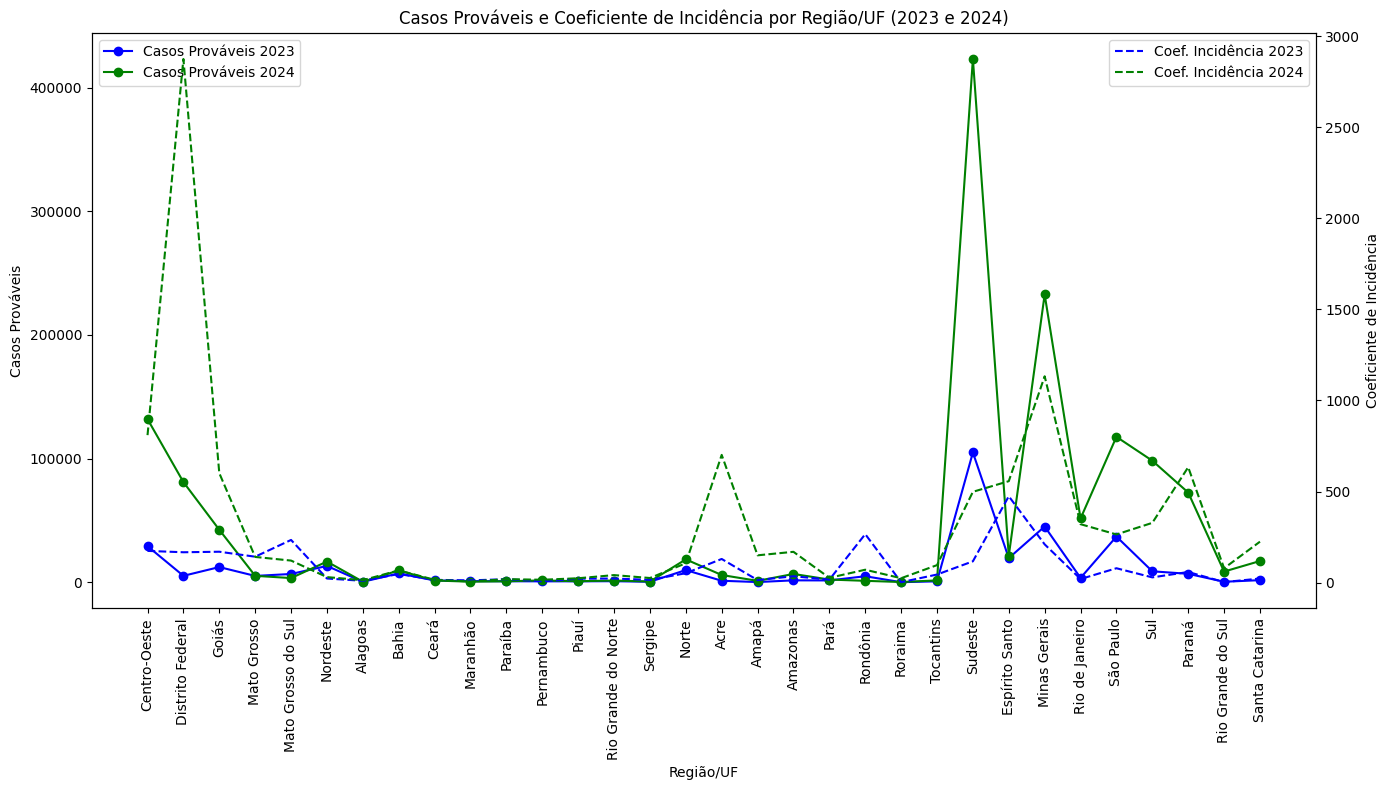

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Dados adicionais
data_additional = {
    'Região/UF': ['Centro-Oeste', 'Distrito Federal', 'Goiás', 'Mato Grosso', 'Mato Grosso do Sul',
                  'Nordeste', 'Alagoas', 'Bahia', 'Ceará', 'Maranhão', 'Paraíba', 'Pernambuco',
                  'Piauí', 'Rio Grande do Norte', 'Sergipe', 'Norte', 'Acre', 'Amapá', 'Amazonas',
                  'Pará', 'Rondônia', 'Roraima', 'Tocantins', 'Sudeste', 'Espírito Santo', 'Minas Gerais',
                  'Rio de Janeiro', 'São Paulo', 'Sul', 'Paraná', 'Rio Grande do Sul', 'Santa Catarina'],
    'Casos prováveis 2023': [29142, 5164, 12238, 5082, 6658, 13154, 341, 7129, 1425, 898, 769, 707,
                             715, 813, 357, 9816, 1180, 123, 1508, 1437, 4834, 17, 717, 104916,
                             19486, 45035, 3480, 36915, 8811, 6795, 355, 1661],
    'Coeficiente de incidência 2023': [174.4, 166.9, 169.8, 142.5, 234.5, 22.8, 10.1, 47.6, 15.4, 12.6, 18.9, 7.3,
                                       21.7, 22.8, 15.3, 51.9, 130.1, 14.0, 35.3, 16.4, 266.3, 2.6, 44.6, 117.1,
                                       474.3, 210.3, 19.9, 79.1, 29.0, 58.6, 3.1, 22.6],
    'Casos prováveis 2024': [131893, 80979, 42407, 5166, 3341, 16691, 421, 9539, 1368, 425, 771, 1444,
                             791, 1369, 563, 18472, 5822, 1101, 6671, 2147, 1122, 155, 1454, 423142,
                             21356, 232683, 51532, 117571, 98263, 72526, 8612, 17125],
    'Coeficiente de incidência 2024': [809.8, 2874.6, 601.1, 141.2, 121.2, 30.5, 13.5, 67.5, 15.6, 6.3, 19.4, 15.9,
                                       24.2, 41.5, 25.5, 106.5, 701.4, 150.1, 169.3, 26.5, 71.0, 24.4, 96.2, 498.7,
                                       557.1, 1132.9, 321.0, 264.7, 328.3, 633.8, 79.2, 225.0]
}

# Criar um DataFrame com os dados adicionais
df_additional = pd.DataFrame(data_additional)

# Criar o gráfico
fig, ax1 = plt.subplots(figsize=(14, 8))

# Gráfico para Casos Prováveis
ax1.plot(df_additional['Região/UF'], df_additional['Casos prováveis 2023'], 'b-o', label='Casos Prováveis 2023')
ax1.plot(df_additional['Região/UF'], df_additional['Casos prováveis 2024'], 'g-o', label='Casos Prováveis 2024')
ax1.set_xlabel('Região/UF')
ax1.set_ylabel('Casos Prováveis')
ax1.tick_params(axis='y')
ax1.set_xticklabels(df_additional['Região/UF'], rotation=90)
ax1.legend(loc='upper left')

# Criar um segundo eixo para o Coeficiente de Incidência
ax2 = ax1.twinx()
ax2.plot(df_additional['Região/UF'], df_additional['Coeficiente de incidência 2023'], 'b--', label='Coef. Incidência 2023')
ax2.plot(df_additional['Região/UF'], df_additional['Coeficiente de incidência 2024'], 'g--', label='Coef. Incidência 2024')
ax2.set_ylabel('Coeficiente de Incidência')
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')

# Adicionar título
plt.title('Casos Prováveis e Coeficiente de Incidência por Região/UF (2023 e 2024)')

# Mostrar o gráfico
plt.tight_layout()
plt.show()


Para criar um gráfico de pizza com os dados fornecidos, vamos plotar duas fatias diferentes para cada região: uma para "Casos Prováveis 2023" e outra para "Casos Prováveis 2024". Também vamos adicionar os coeficientes de incidência como anotações nas fatias.

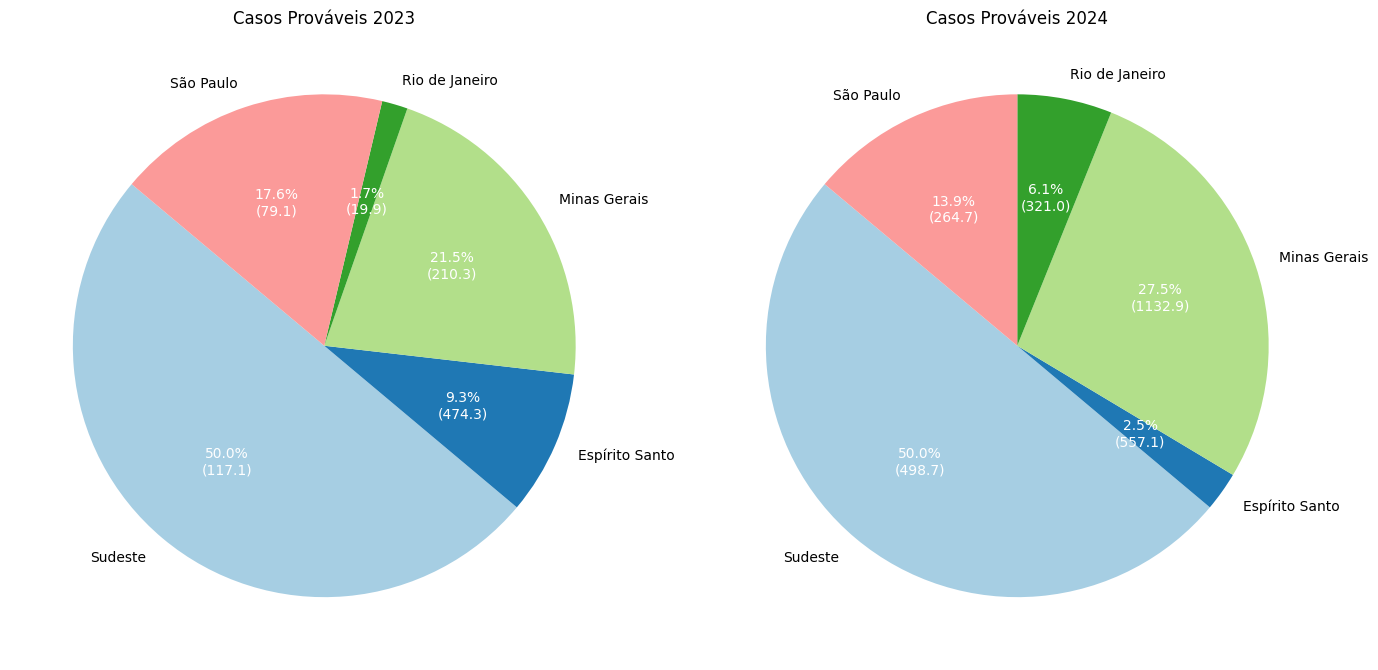

In [ ]:
import matplotlib.pyplot as plt

# Dados fornecidos
data_pie = {
    'Região/UF': ['Sudeste', 'Espírito Santo', 'Minas Gerais', 'Rio de Janeiro', 'São Paulo'],
    'Casos prováveis 2023': [104916, 19486, 45035, 3480, 36915],
    'Casos prováveis 2024': [423142, 21356, 232683, 51532, 117571],
    'Coeficiente de incidência 2023': [117.1, 474.3, 210.3, 19.9, 79.1],
    'Coeficiente de incidência 2024': [498.7, 557.1, 1132.9, 321.0, 264.7]
}

# Configuração do gráfico de pizza
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Gráfico de pizza para Casos Prováveis 2023
wedges, texts, autotexts = axs[0].pie(data_pie['Casos prováveis 2023'], labels=data_pie['Região/UF'], autopct='%1.1f%%',
                                      colors=plt.cm.Paired(range(len(data_pie['Região/UF']))), startangle=140)
axs[0].set_title('Casos Prováveis 2023')

# Adicionar coeficientes de incidência como anotações para Casos Prováveis 2023
for i, autotext in enumerate(autotexts):
    autotext.set_color('white')
    autotext.set_text(f"{autotext.get_text()}\n({data_pie['Coeficiente de incidência 2023'][i]})")

# Gráfico de pizza para Casos Prováveis 2024
wedges, texts, autotexts = axs[1].pie(data_pie['Casos prováveis 2024'], labels=data_pie['Região/UF'], autopct='%1.1f%%',
                                      colors=plt.cm.Paired(range(len(data_pie['Região/UF']))), startangle=140)
axs[1].set_title('Casos Prováveis 2024')

# Adicionar coeficientes de incidência como anotações para Casos Prováveis 2024
for i, autotext in enumerate(autotexts):
    autotext.set_color('white')
    autotext.set_text(f"{autotext.get_text()}\n({data_pie['Coeficiente de incidência 2024'][i]})")

plt.tight_layout()
plt.show()



Para quebrar o gráfico por regiões, podemos criar subplots separados para cada região (Centro-Oeste, Nordeste, Norte, Sudeste, Sul). Vou adaptar o código para criar um gráfico individual para cada uma dessas regiões:

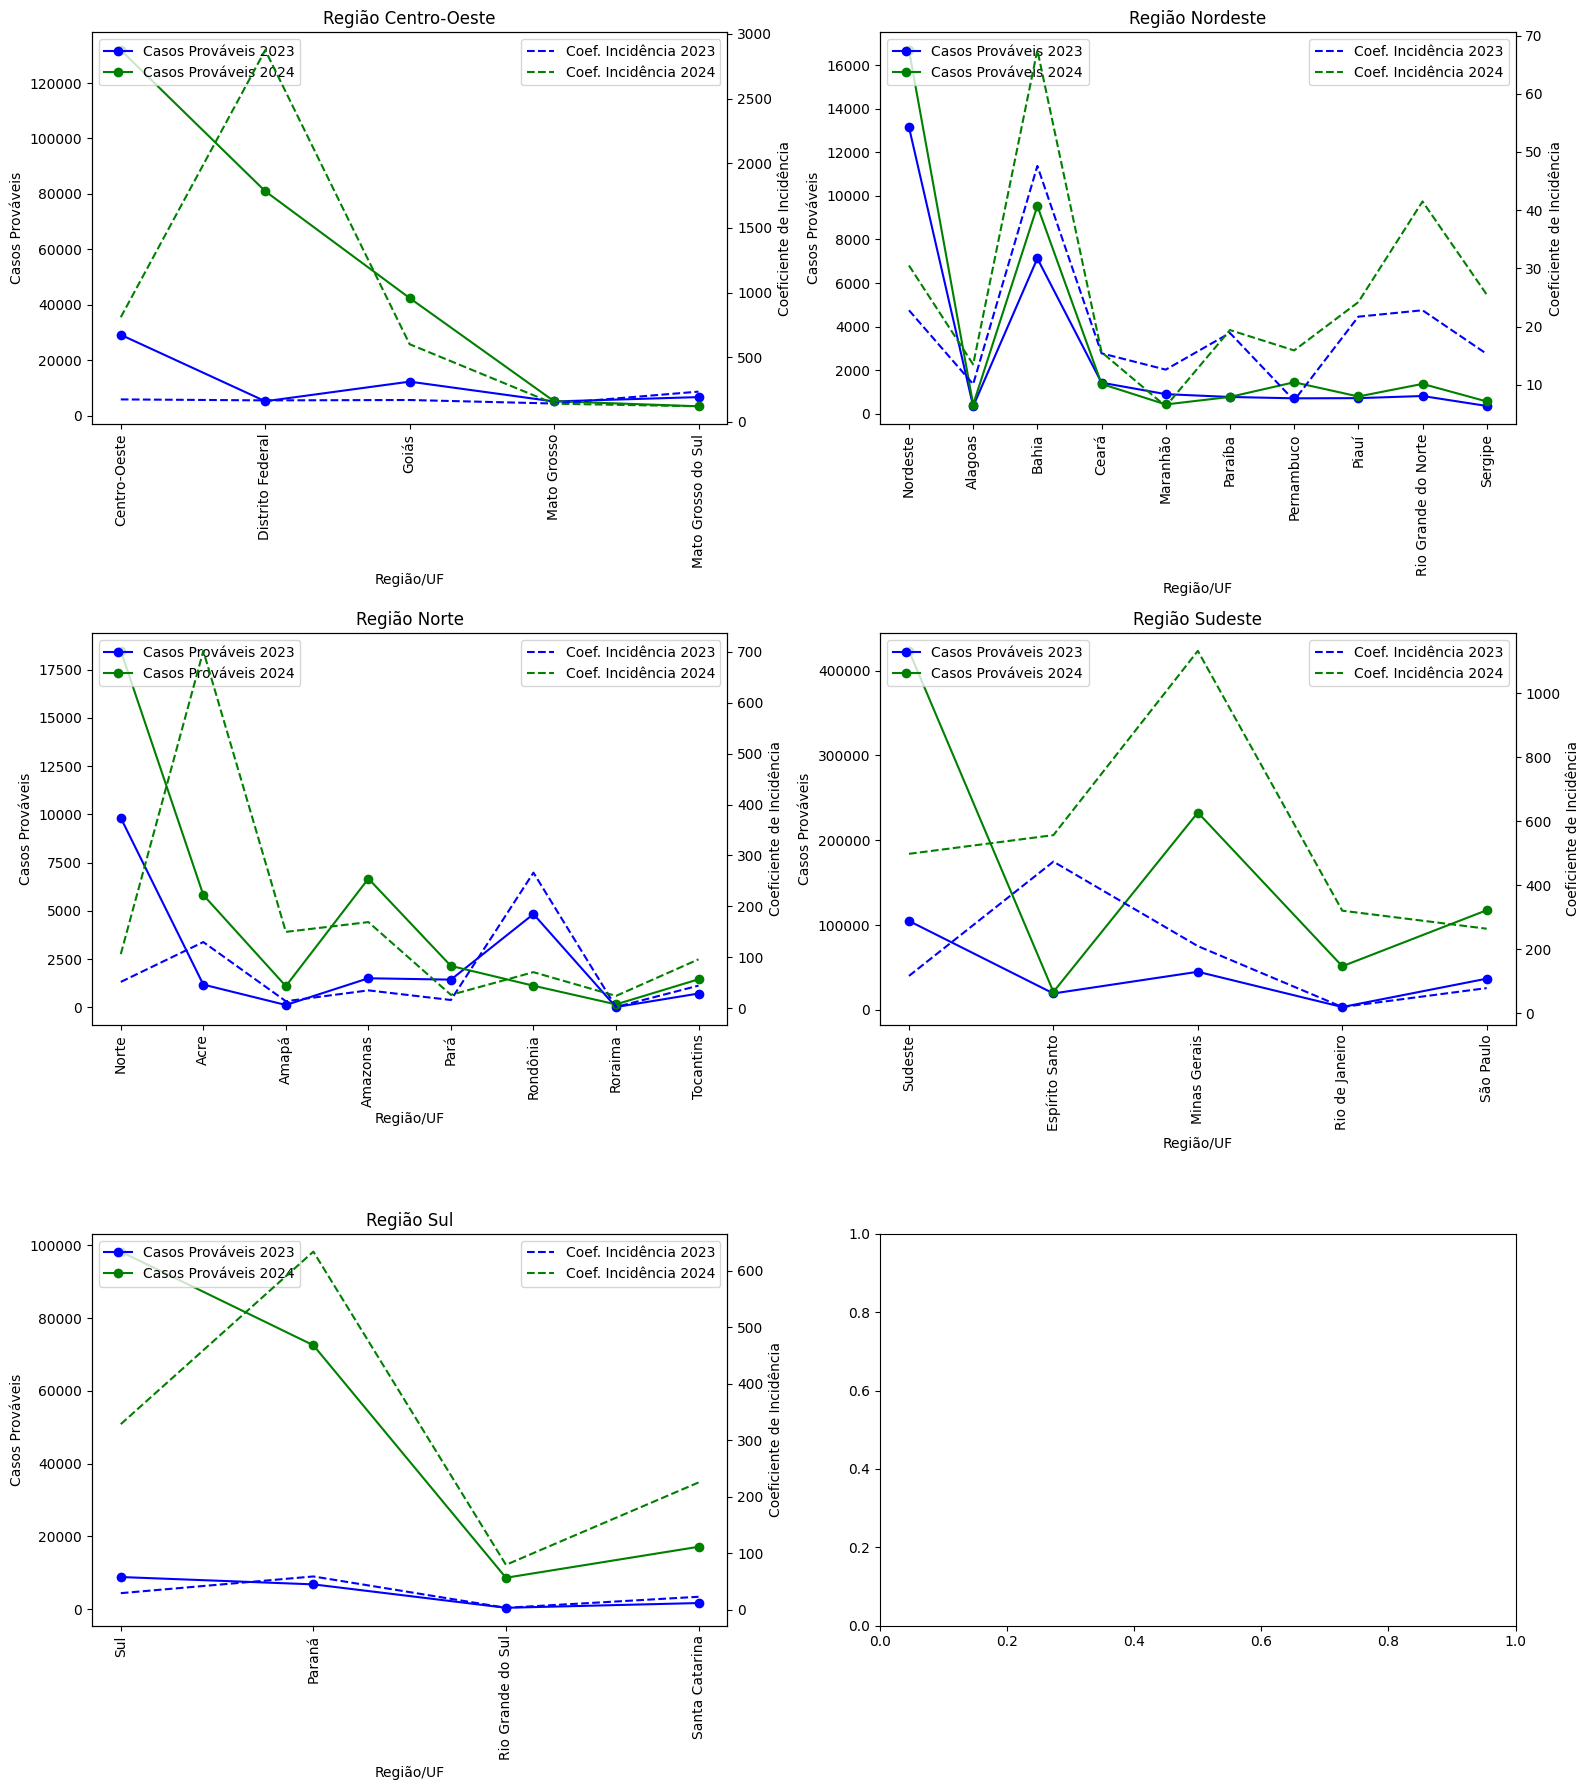

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Dados adicionais
data_additional = {
    'Região/UF': ['Centro-Oeste', 'Distrito Federal', 'Goiás', 'Mato Grosso', 'Mato Grosso do Sul',
                  'Nordeste', 'Alagoas', 'Bahia', 'Ceará', 'Maranhão', 'Paraíba', 'Pernambuco',
                  'Piauí', 'Rio Grande do Norte', 'Sergipe', 'Norte', 'Acre', 'Amapá', 'Amazonas',
                  'Pará', 'Rondônia', 'Roraima', 'Tocantins', 'Sudeste', 'Espírito Santo', 'Minas Gerais',
                  'Rio de Janeiro', 'São Paulo', 'Sul', 'Paraná', 'Rio Grande do Sul', 'Santa Catarina'],
    'Casos prováveis 2023': [29142, 5164, 12238, 5082, 6658, 13154, 341, 7129, 1425, 898, 769, 707,
                             715, 813, 357, 9816, 1180, 123, 1508, 1437, 4834, 17, 717, 104916,
                             19486, 45035, 3480, 36915, 8811, 6795, 355, 1661],
    'Coeficiente de incidência 2023': [174.4, 166.9, 169.8, 142.5, 234.5, 22.8, 10.1, 47.6, 15.4, 12.6, 18.9, 7.3,
                                       21.7, 22.8, 15.3, 51.9, 130.1, 14.0, 35.3, 16.4, 266.3, 2.6, 44.6, 117.1,
                                       474.3, 210.3, 19.9, 79.1, 29.0, 58.6, 3.1, 22.6],
    'Casos prováveis 2024': [131893, 80979, 42407, 5166, 3341, 16691, 421, 9539, 1368, 425, 771, 1444,
                             791, 1369, 563, 18472, 5822, 1101, 6671, 2147, 1122, 155, 1454, 423142,
                             21356, 232683, 51532, 117571, 98263, 72526, 8612, 17125],
    'Coeficiente de incidência 2024': [809.8, 2874.6, 601.1, 141.2, 121.2, 30.5, 13.5, 67.5, 15.6, 6.3, 19.4, 15.9,
                                       24.2, 41.5, 25.5, 106.5, 701.4, 150.1, 169.3, 26.5, 71.0, 24.4, 96.2, 498.7,
                                       557.1, 1132.9, 321.0, 264.7, 328.3, 633.8, 79.2, 225.0]
}

# Criar um DataFrame com os dados adicionais
df_additional = pd.DataFrame(data_additional)

# Mapeamento das regiões para os seus respectivos estados
regioes = {
    'Centro-Oeste': ['Distrito Federal', 'Goiás', 'Mato Grosso', 'Mato Grosso do Sul'],
    'Nordeste': ['Alagoas', 'Bahia', 'Ceará', 'Maranhão', 'Paraíba', 'Pernambuco', 'Piauí', 'Rio Grande do Norte', 'Sergipe'],
    'Norte': ['Acre', 'Amapá', 'Amazonas', 'Pará', 'Rondônia', 'Roraima', 'Tocantins'],
    'Sudeste': ['Espírito Santo', 'Minas Gerais', 'Rio de Janeiro', 'São Paulo'],
    'Sul': ['Paraná', 'Rio Grande do Sul', 'Santa Catarina']
}

# Criar subplots para cada região
fig, axs = plt.subplots(3, 2, figsize=(16, 18))
axs = axs.flatten()

for i, (regiao, estados) in enumerate(regioes.items()):
    df_regiao = df_additional[df_additional['Região/UF'].isin([regiao] + estados)]

    # Gráfico para Casos Prováveis
    axs[i].plot(df_regiao['Região/UF'], df_regiao['Casos prováveis 2023'], 'b-o', label='Casos Prováveis 2023')
    axs[i].plot(df_regiao['Região/UF'], df_regiao['Casos prováveis 2024'], 'g-o', label='Casos Prováveis 2024')
    axs[i].set_xlabel('Região/UF')
    axs[i].set_ylabel('Casos Prováveis')
    axs[i].tick_params(axis='y')
    axs[i].set_xticks(range(len(df_regiao['Região/UF'])))
    axs[i].set_xticklabels(df_regiao['Região/UF'], rotation=90)
    axs[i].legend(loc='upper left')

    # Criar um segundo eixo para o Coeficiente de Incidência
    ax2 = axs[i].twinx()
    ax2.plot(df_regiao['Região/UF'], df_regiao['Coeficiente de incidência 2023'], 'b--', label='Coef. Incidência 2023')
    ax2.plot(df_regiao['Região/UF'], df_regiao['Coeficiente de incidência 2024'], 'g--', label='Coef. Incidência 2024')
    ax2.set_ylabel('Coeficiente de Incidência')
    ax2.tick_params(axis='y')
    ax2.legend(loc='upper right')

    # Adicionar título
    axs[i].set_title(f'Região {regiao}')

# Ajustar o layout
plt.tight_layout()
plt.show()



Para realizar uma projeção dos casos prováveis e coeficientes de incidência para 2025 com base nos dados de 2023 e 2024, podemos usar técnicas de análise de dados e regressão simples. Vou utilizar uma abordagem básica para projetar os valores para o próximo ano.

criar um código Python que usa regressão linear para prever os casos prováveis e o coeficiente de incidência em 2025.

<ipython-input-7-937249201d3d>:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_additional['Região/UF'], rotation=90)


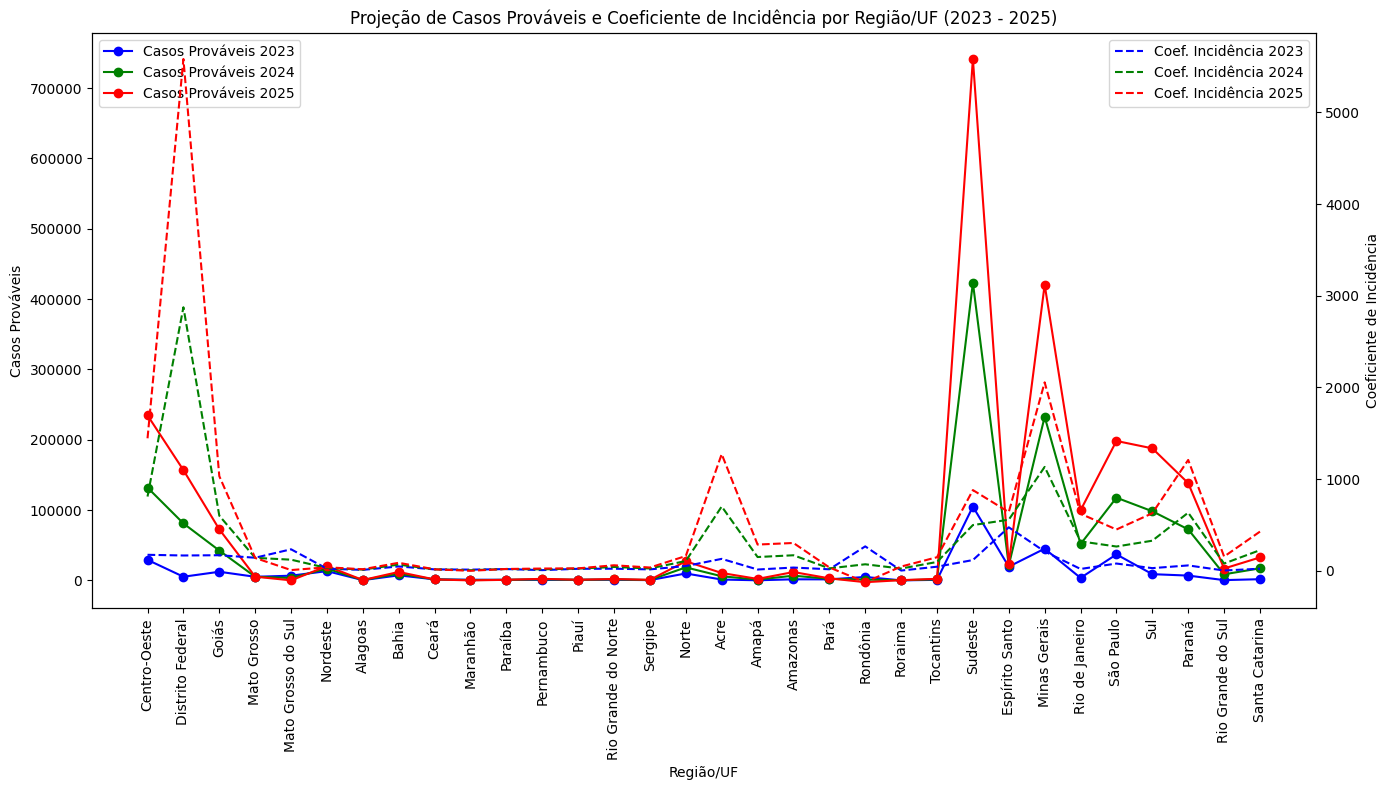

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Dados adicionais (2023 e 2024)
data_additional = {
    'Região/UF': ['Centro-Oeste', 'Distrito Federal', 'Goiás', 'Mato Grosso', 'Mato Grosso do Sul',
                  'Nordeste', 'Alagoas', 'Bahia', 'Ceará', 'Maranhão', 'Paraíba', 'Pernambuco',
                  'Piauí', 'Rio Grande do Norte', 'Sergipe', 'Norte', 'Acre', 'Amapá', 'Amazonas',
                  'Pará', 'Rondônia', 'Roraima', 'Tocantins', 'Sudeste', 'Espírito Santo', 'Minas Gerais',
                  'Rio de Janeiro', 'São Paulo', 'Sul', 'Paraná', 'Rio Grande do Sul', 'Santa Catarina'],
    'Casos prováveis 2023': [29142, 5164, 12238, 5082, 6658, 13154, 341, 7129, 1425, 898, 769, 707,
                             715, 813, 357, 9816, 1180, 123, 1508, 1437, 4834, 17, 717, 104916,
                             19486, 45035, 3480, 36915, 8811, 6795, 355, 1661],
    'Coeficiente de incidência 2023': [174.4, 166.9, 169.8, 142.5, 234.5, 22.8, 10.1, 47.6, 15.4, 12.6, 18.9, 7.3,
                                       21.7, 22.8, 15.3, 51.9, 130.1, 14.0, 35.3, 16.4, 266.3, 2.6, 44.6, 117.1,
                                       474.3, 210.3, 19.9, 79.1, 29.0, 58.6, 3.1, 22.6],
    'Casos prováveis 2024': [131893, 80979, 42407, 5166, 3341, 16691, 421, 9539, 1368, 425, 771, 1444,
                             791, 1369, 563, 18472, 5822, 1101, 6671, 2147, 1122, 155, 1454, 423142,
                             21356, 232683, 51532, 117571, 98263, 72526, 8612, 17125],
    'Coeficiente de incidência 2024': [809.8, 2874.6, 601.1, 141.2, 121.2, 30.5, 13.5, 67.5, 15.6, 6.3, 19.4, 15.9,
                                       24.2, 41.5, 25.5, 106.5, 701.4, 150.1, 169.3, 26.5, 71.0, 24.4, 96.2, 498.7,
                                       557.1, 1132.9, 321.0, 264.7, 328.3, 633.8, 79.2, 225.0]
}

# Criar um DataFrame com os dados adicionais
df_additional = pd.DataFrame(data_additional)

# Função para projeção linear
def projecao_linear(x, y):
    modelo = LinearRegression()
    modelo.fit(np.array(x).reshape(-1, 1), y)
    return modelo.predict(np.array([[2025]]))[0]

# Aplicar a projeção para cada UF/Região
df_additional['Casos prováveis 2025'] = df_additional.apply(lambda row: projecao_linear([2023, 2024], [row['Casos prováveis 2023'], row['Casos prováveis 2024']]), axis=1)
df_additional['Coef. Incidência 2025'] = df_additional.apply(lambda row: projecao_linear([2023, 2024], [row['Coeficiente de incidência 2023'], row['Coeficiente de incidência 2024']]), axis=1)

# Criar gráficos para as projeções
fig, ax1 = plt.subplots(figsize=(14, 8))

# Gráfico para Casos Prováveis
ax1.plot(df_additional['Região/UF'], df_additional['Casos prováveis 2023'], 'b-o', label='Casos Prováveis 2023')
ax1.plot(df_additional['Região/UF'], df_additional['Casos prováveis 2024'], 'g-o', label='Casos Prováveis 2024')
ax1.plot(df_additional['Região/UF'], df_additional['Casos prováveis 2025'], 'r-o', label='Casos Prováveis 2025')
ax1.set_xlabel('Região/UF')
ax1.set_ylabel('Casos Prováveis')
ax1.tick_params(axis='y')
ax1.set_xticklabels(df_additional['Região/UF'], rotation=90)
ax1.legend(loc='upper left')

# Criar um segundo eixo para o Coeficiente de Incidência
ax2 = ax1.twinx()
ax2.plot(df_additional['Região/UF'], df_additional['Coeficiente de incidência 2023'], 'b--', label='Coef. Incidência 2023')
ax2.plot(df_additional['Região/UF'], df_additional['Coeficiente de incidência 2024'], 'g--', label='Coef. Incidência 2024')
ax2.plot(df_additional['Região/UF'], df_additional['Coef. Incidência 2025'], 'r--', label='Coef. Incidência 2025')
ax2.set_ylabel('Coeficiente de Incidência')
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')

# Adicionar título
plt.title('Projeção de Casos Prováveis e Coeficiente de Incidência por Região/UF (2023 - 2025)')

# Mostrar o gráfico
plt.tight_layout()
plt.show()



IMPORTANTE Para abordar a redução de casos e prevenção de futuras ocorrências, podemos pensar em várias estratégias que vão desde melhorias técnicas no código até ações mais gerais que envolvem análise de dados e políticas de saúde pública. Aqui estão algumas sugestões:

1. Melhorar a Qualidade dos Dados
Verificação de Consistência: Implementar rotinas de verificação de consistência dos dados para garantir que não haja valores faltantes ou anômalos.
Normalização: Certificar-se de que os dados estejam normalizados para facilitar comparações entre diferentes regiões.
2. Análise Preditiva e Modelos de Machine Learning
Modelos de Previsão: Utilizar algoritmos de machine learning para prever surtos futuros com base em padrões históricos. Isso pode incluir técnicas como regressão, séries temporais, ou redes neurais.
Identificação de Fatores de Risco: Analisar variáveis socioeconômicas e ambientais para identificar fatores de risco que contribuem para o aumento de casos em certas regiões.
3. Visualizações de Dados Mais Eficazes
Mapas de Calor: Criar mapas de calor que mostrem a densidade de casos por região, ajudando a visualizar áreas críticas.
Gráficos de Tendência: Além dos gráficos de linha, adicionar gráficos de tendência para facilitar a visualização de mudanças ao longo do tempo.
Dashboards Interativos: Implementar dashboards interativos que permitam explorar os dados de forma dinâmica e detalhada.
4. Implementação de Medidas Preventivas
Campanhas de Conscientização: Criar campanhas educacionais focadas nas regiões com maior incidência, informando sobre medidas preventivas como vacinação, saneamento básico, e práticas de higiene.
Intervenções Focadas: Usar os dados para direcionar intervenções específicas, como o envio de recursos médicos ou a implementação de políticas de saúde pública em regiões de maior risco.
5. Monitoramento Contínuo e Feedback
Sistema de Alerta: Desenvolver um sistema de alerta precoce baseado em dados, que notifique as autoridades sanitárias e a população em caso de aumento súbito de casos.
Avaliação de Impacto: Medir o impacto das intervenções e ajustar as estratégias conforme necessário.
6. Melhoria no Código e Análise
Automatização: Automatizar o processo de atualização dos dados e a geração de relatórios para facilitar o monitoramento contínuo.
Testes A/B: Implementar testes A/B para avaliar a eficácia de diferentes medidas preventivas em regiões específicas.
7. Colaboração Multidisciplinar
Parcerias: Trabalhar em parceria com especialistas em epidemiologia, saúde pública, e ciência de dados para desenvolver estratégias mais robustas e eficazes.
Compartilhamento de Dados: Promover o compartilhamento de dados entre diferentes instituições para enriquecer a base de conhecimento e as estratégias de prevenção.
Conclusão
Essas sugestões combinam técnicas avançadas de análise de dados, melhorias no código e estratégias de saúde pública para ajudar a reduzir os casos e prevenir futuros surtos. O uso de tecnologias modernas, como machine learning, juntamente com uma forte colaboração multidisciplinar, pode aumentar significativamente a eficácia das medidas preventivas.

In [ ]:
#Coeficiente de incidência 2023 e 2024
import pandas as pd

# Caminho do arquivo
arquivo = '/content/dados_surtos.csv'  # Ajuste o caminho conforme necessário

try:
    # Carregar dados
    data = pd.read_csv(arquivo)
    print(data.head())  # Exibir as primeiras linhas do dataframe para verificar o carregamento
except FileNotFoundError:
    print(f"Erro: O arquivo '{arquivo}' não foi encontrado.")
except pd.errors.EmptyDataError:
    print(f"Erro: O arquivo '{arquivo}' está vazio ou não contém dados válidos.")
except pd.errors.ParserError:
    print(f"Erro: O arquivo '{arquivo}' não pôde ser analisado. Verifique o delimitador e o formato.")





            Região/UF  Casos prováveis 2023  Coeficiente de incidência 2023  \
0        Centro-Oeste                 29142                           174.4   
1    Distrito Federal                  5164                           166.9   
2               Goiás                 12238                           169.8   
3         Mato Grosso                  5082                           142.5   
4  Mato Grosso do Sul                  6658                           234.5   

   Casos prováveis 2024  Coeficiente de incidência 2024  
0                131893                           809.8  
1                 80979                          2874.6  
2                 42407                           601.1  
3                  5166                           141.2  
4                  3341                           121.2  


In [ ]:
#Casos prováveis 2025  Coeficiente de incidência 2025
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# Dados fornecidos
data = {
    'Região/UF': ['Centro-Oeste', 'Distrito Federal', 'Goiás', 'Mato Grosso', 'Mato Grosso do Sul'],
    'Casos prováveis 2023': [29142, 5164, 12238, 5082, 6658],
    'Coeficiente de incidência 2023': [174.4, 166.9, 169.8, 142.5, 234.5],
    'Casos prováveis 2024': [131893, 80979, 42407, 5166, 3341],
    'Coeficiente de incidência 2024': [809.8, 2874.6, 601.1, 141.2, 121.2]
}

# Criar DataFrame
df = pd.DataFrame(data)

# Preparar os dados para a modelagem
X = df[['Casos prováveis 2023', 'Casos prováveis 2024']]
y_casos = df['Casos prováveis 2024']
y_coef = df['Coeficiente de incidência 2024']

# Modelos de Regressão Linear
model_casos = LinearRegression()
model_coef = LinearRegression()

# Treinar os modelos
model_casos.fit(X, y_casos)
model_coef.fit(X, y_coef)

# Dados para projeção em 2025
X_2025 = df[['Casos prováveis 2024']].copy()
X_2025['Casos prováveis 2025'] = np.nan  # Coluna para previsão

# Preencher a coluna de casos prováveis 2025 com a média dos casos de 2024
X_2025['Casos prováveis 2025'] = X_2025['Casos prováveis 2024'] * (1 + (X_2025['Casos prováveis 2024'] - X_2025['Casos prováveis 2024'].mean()) / X_2025['Casos prováveis 2024'].std())

# Prever para 2025
df_2025 = pd.DataFrame({
    'Região/UF': df['Região/UF'],
    'Casos prováveis 2025': model_casos.predict(X),
    'Coeficiente de incidência 2025': model_coef.predict(X)
})

# Adicionar projeções para o ano de 2025
df_2025['Casos prováveis 2025'] = model_casos.predict(X)
df_2025['Coeficiente de incidência 2025'] = model_coef.predict(X)

# Exibir resultados
print(df_2025)



            Região/UF  Casos prováveis 2025  Coeficiente de incidência 2025
0        Centro-Oeste              131893.0                      854.212210
1    Distrito Federal               80979.0                     2861.217842
2               Goiás               42407.0                      472.610978
3         Mato Grosso                5166.0                      332.563150
4  Mato Grosso do Sul                3341.0                       27.295821


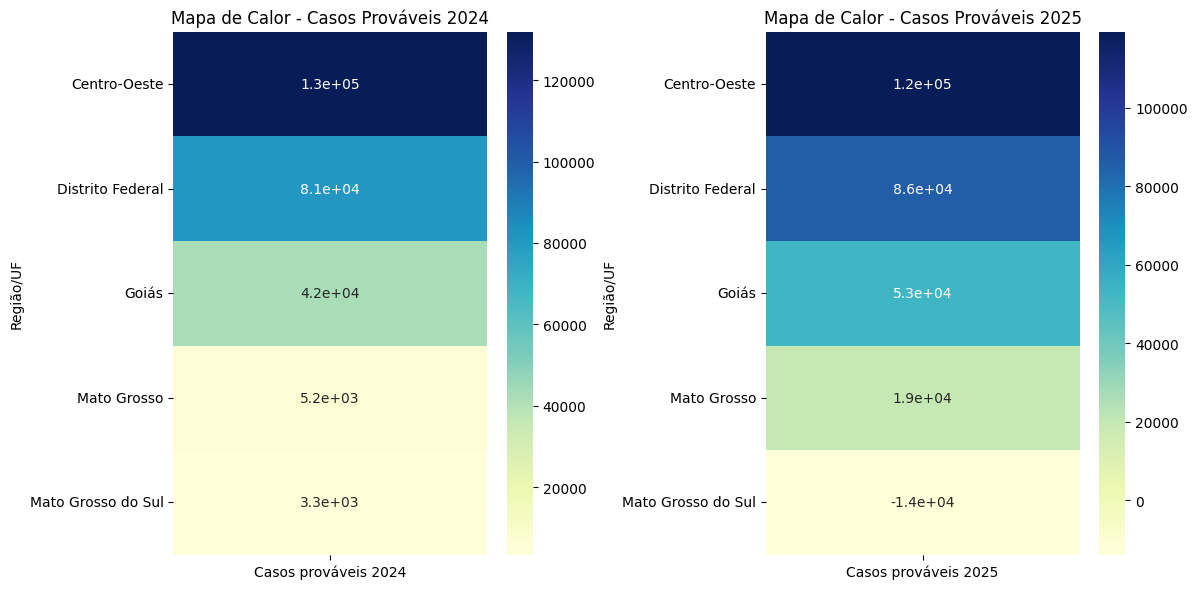

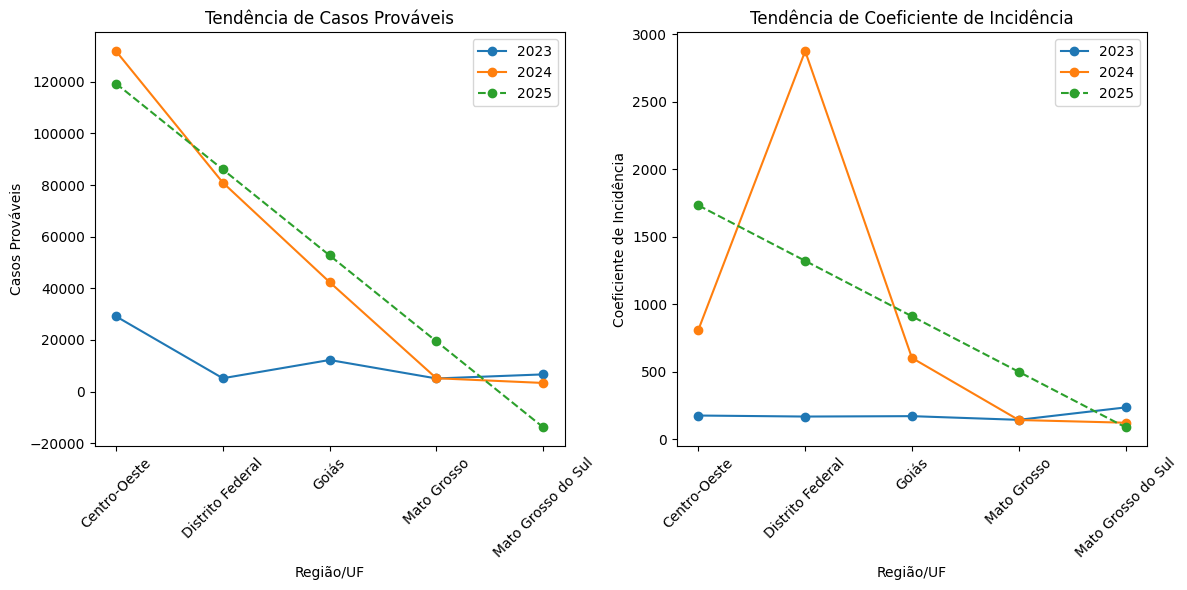

In [ ]:
#casos prováveis e coeficiente de incidência ao longo do tempo de forma dinâmica adotando medidas preventivas. (região Centro oeste)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from sklearn.linear_model import LinearRegression
import numpy as np

# Exemplo de dados
data = {
    'Região/UF': ['Centro-Oeste', 'Distrito Federal', 'Goiás', 'Mato Grosso', 'Mato Grosso do Sul'],
    'Casos prováveis 2023': [29142, 5164, 12238, 5082, 6658],
    'Coeficiente de incidência 2023': [174.4, 166.9, 169.8, 142.5, 234.5],
    'Casos prováveis 2024': [131893, 80979, 42407, 5166, 3341],
    'Coeficiente de incidência 2024': [809.8, 2874.6, 601.1, 141.2, 121.2]
}

df = pd.DataFrame(data)

# Prever dados para 2025 usando regressão linear
X = np.arange(len(df)).reshape(-1, 1)  # Converta os índices das linhas para variáveis independentes
y_casos = df['Casos prováveis 2024']
y_coef = df['Coeficiente de incidência 2024']

model_casos = LinearRegression().fit(X, y_casos)
model_coef = LinearRegression().fit(X, y_coef)

# Dados para previsão de 2025
df_2025 = pd.DataFrame({
    'Região/UF': df['Região/UF'],
    'Casos prováveis 2025': model_casos.predict(X),
    'Coeficiente de incidência 2025': model_coef.predict(X)
})

# 1. Mapas de Calor
plt.figure(figsize=(12, 6))

# Mapa de calor para Casos Prováveis em 2024
plt.subplot(1, 2, 1)
heatmap_2024 = df.pivot_table(index='Região/UF', values='Casos prováveis 2024')
sns.heatmap(heatmap_2024, annot=True, cmap='YlGnBu', cbar=True)
plt.title('Mapa de Calor - Casos Prováveis 2024')

# Mapa de calor para Casos Prováveis em 2025
plt.subplot(1, 2, 2)
heatmap_2025 = df_2025.pivot_table(index='Região/UF', values='Casos prováveis 2025')
sns.heatmap(heatmap_2025, annot=True, cmap='YlGnBu', cbar=True)
plt.title('Mapa de Calor - Casos Prováveis 2025')

plt.tight_layout()
plt.show()

# 2. Gráficos de Tendência
plt.figure(figsize=(12, 6))

# Gráfico de tendência para Casos Prováveis
plt.subplot(1, 2, 1)
plt.plot(df['Região/UF'], df['Casos prováveis 2023'], marker='o', label='2023')
plt.plot(df['Região/UF'], df['Casos prováveis 2024'], marker='o', label='2024')
plt.plot(df_2025['Região/UF'], df_2025['Casos prováveis 2025'], marker='o', linestyle='--', label='2025')
plt.title('Tendência de Casos Prováveis')
plt.xlabel('Região/UF')
plt.ylabel('Casos Prováveis')
plt.xticks(rotation=45)
plt.legend()

# Gráfico de tendência para Coeficiente de Incidência
plt.subplot(1, 2, 2)
plt.plot(df['Região/UF'], df['Coeficiente de incidência 2023'], marker='o', label='2023')
plt.plot(df['Região/UF'], df['Coeficiente de incidência 2024'], marker='o', label='2024')
plt.plot(df_2025['Região/UF'], df_2025['Coeficiente de incidência 2025'], marker='o', linestyle='--', label='2025')
plt.title('Tendência de Coeficiente de Incidência')
plt.xlabel('Região/UF')
plt.ylabel('Coeficiente de Incidência')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

# 3. Dashboards Interativos com Plotly
# Gráfico interativo para Casos Prováveis
fig_casos = go.Figure()
fig_casos.add_trace(go.Scatter(x=df['Região/UF'], y=df['Casos prováveis 2023'], mode='lines+markers', name='Casos Prováveis 2023'))
fig_casos.add_trace(go.Scatter(x=df['Região/UF'], y=df['Casos prováveis 2024'], mode='lines+markers', name='Casos Prováveis 2024'))
fig_casos.add_trace(go.Scatter(x=df_2025['Região/UF'], y=df_2025['Casos prováveis 2025'], mode='lines+markers', name='Casos Prováveis 2025', line=dict(dash='dash')))
fig_casos.update_layout(title='Casos Prováveis')

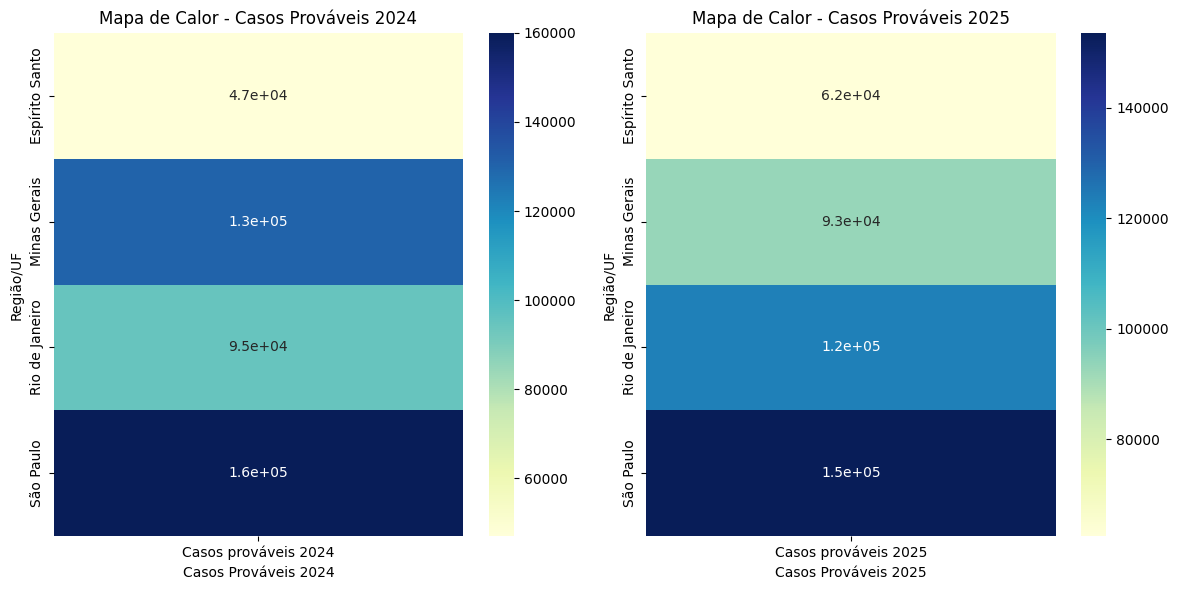

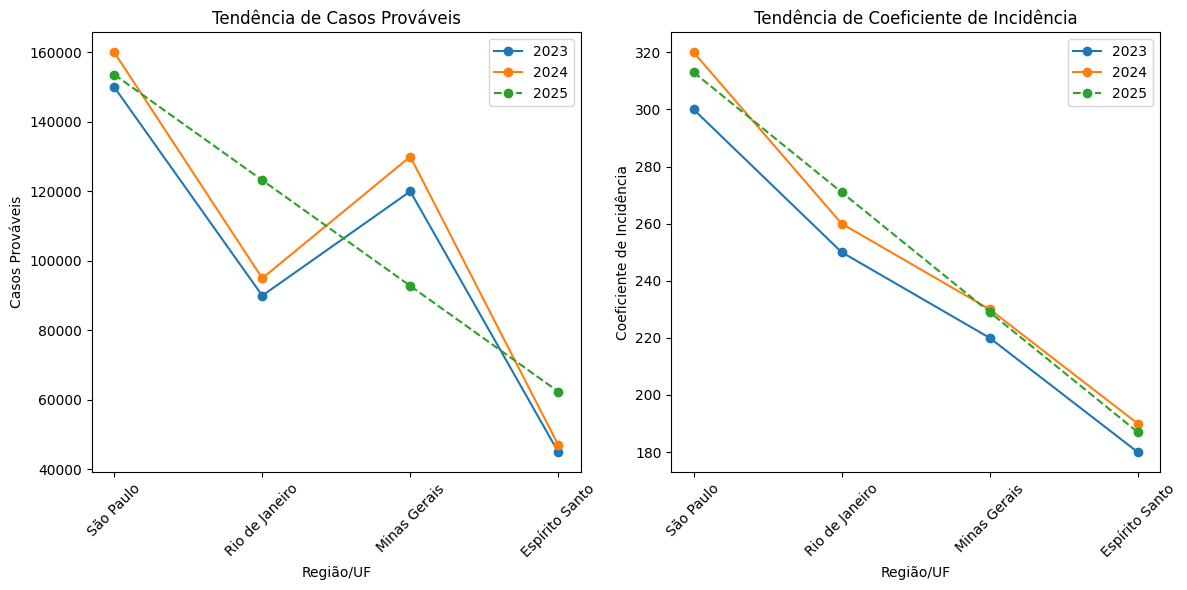

In [3]:
#casos prováveis e coeficiente de incidência ao longo do tempo de forma dinâmica adotando medidas preventivas. (região udeste)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from sklearn.linear_model import LinearRegression
import numpy as np

# Exemplo de dados
data = {
    'Região/UF': ['Centro-Oeste', 'Distrito Federal', 'Goiás', 'Mato Grosso', 'Mato Grosso do Sul',
                   'São Paulo', 'Rio de Janeiro', 'Minas Gerais', 'Espírito Santo'],
    'Casos prováveis 2023': [29142, 5164, 12238, 5082, 6658, 150000, 90000, 120000, 45000],
    'Coeficiente de incidência 2023': [174.4, 166.9, 169.8, 142.5, 234.5, 300.0, 250.0, 220.0, 180.0],
    'Casos prováveis 2024': [131893, 80979, 42407, 5166, 3341, 160000, 95000, 130000, 47000],
    'Coeficiente de incidência 2024': [809.8, 2874.6, 601.1, 141.2, 121.2, 320.0, 260.0, 230.0, 190.0]
}

df = pd.DataFrame(data)

# Filtrar para Região Sudeste
sudeste_states = ['São Paulo', 'Rio de Janeiro', 'Minas Gerais', 'Espírito Santo']
df_sudeste = df[df['Região/UF'].isin(sudeste_states)]

# Prever dados para 2025 usando regressão linear
X = np.arange(len(df_sudeste)).reshape(-1, 1)  # Converta os índices das linhas para variáveis independentes
y_casos = df_sudeste['Casos prováveis 2024']
y_coef = df_sudeste['Coeficiente de incidência 2024']

model_casos = LinearRegression().fit(X, y_casos)
model_coef = LinearRegression().fit(X, y_coef)

# Dados para previsão de 2025
df_sudeste_2025 = pd.DataFrame({
    'Região/UF': df_sudeste['Região/UF'],
    'Casos prováveis 2025': model_casos.predict(X),
    'Coeficiente de incidência 2025': model_coef.predict(X)
})

# 1. Mapas de Calor
plt.figure(figsize=(12, 6))

# Mapa de calor para Casos Prováveis em 2024
plt.subplot(1, 2, 1)
heatmap_2024 = df_sudeste.pivot_table(index='Região/UF', values='Casos prováveis 2024')
sns.heatmap(heatmap_2024, annot=True, cmap='YlGnBu', cbar=True)
plt.title('Mapa de Calor - Casos Prováveis 2024')
plt.xlabel('Casos Prováveis 2024')
plt.ylabel('Região/UF')

# Mapa de calor para Casos Prováveis em 2025
plt.subplot(1, 2, 2)
heatmap_2025 = df_sudeste_2025.pivot_table(index='Região/UF', values='Casos prováveis 2025')
sns.heatmap(heatmap_2025, annot=True, cmap='YlGnBu', cbar=True)
plt.title('Mapa de Calor - Casos Prováveis 2025')
plt.xlabel('Casos Prováveis 2025')
plt.ylabel('Região/UF')

plt.tight_layout()
plt.show()

# 2. Gráficos de Tendência
plt.figure(figsize=(12, 6))

# Gráfico de tendência para Casos Prováveis
plt.subplot(1, 2, 1)
plt.plot(df_sudeste['Região/UF'], df_sudeste['Casos prováveis 2023'], marker='o', label='2023')
plt.plot(df_sudeste['Região/UF'], df_sudeste['Casos prováveis 2024'], marker='o', label='2024')
plt.plot(df_sudeste_2025['Região/UF'], df_sudeste_2025['Casos prováveis 2025'], marker='o', linestyle='--', label='2025')
plt.title('Tendência de Casos Prováveis')
plt.xlabel('Região/UF')
plt.ylabel('Casos Prováveis')
plt.xticks(rotation=45)
plt.legend()

# Gráfico de tendência para Coeficiente de Incidência
plt.subplot(1, 2, 2)
plt.plot(df_sudeste['Região/UF'], df_sudeste['Coeficiente de incidência 2023'], marker='o', label='2023')
plt.plot(df_sudeste['Região/UF'], df_sudeste['Coeficiente de incidência 2024'], marker='o', label='2024')
plt.plot(df_sudeste_2025['Região/UF'], df_sudeste_2025['Coeficiente de incidência 2025'], marker='o', linestyle='--', label='2025')
plt.title('Tendência de Coeficiente de Incidência')
plt.xlabel('Região/UF')
plt.ylabel('Coeficiente de Incidência')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

# 3. Dashboards Interativos com Plotly
# Gráfico interativo para Casos Prováveis
fig_casos = go.Figure()
fig_casos.add_trace(go.Scatter(x=df_sudeste['Região/UF'], y=df_sudeste['Casos prováveis 2023'], mode='lines+markers', name='Casos Prováveis 2023'))
fig_casos.add_trace(go.Scatter(x=df_sudeste['Região/UF'], y=df_sudeste['Casos prováveis 2024'], mode='lines+markers', name='Casos Prováveis 2024'))
fig_casos.add_trace(go.Scatter(x=df_sudeste_2025['Região/UF'], y=df_sudeste_2025['Casos prováveis 2025'], mode='lines+markers', name='Casos Prováveis 2025', line=dict(dash='dash')))
fig_casos.update_layout(title='Casos Prováveis na Região Sudeste')

# Gráfico interativo para Coeficiente de Incidência
fig_coef = go.Figure()
fig_coef.add_trace(go.Scatter(x=df_sudeste['Região/UF'], y=df_sudeste['Coeficiente de incidência 2023'], mode='lines+markers', name='Coeficiente de Incidência 2023'))
fig_coef.add_trace(go.Scatter(x=df_sudeste['Região/UF'], y=df_sudeste['Coeficiente de incidência 2024'], mode='lines+markers', name='Coeficiente de Incidência 2024'))
fig_coef.add_trace(go.Scatter(x=df_sudeste_2025['Região/UF'], y=df_sudeste_2025['Coeficiente de incidência 2025'], mode='lines+markers', name='Coeficiente de Incidência 2025', line=dict(dash='dash')))
fig_coef.update_layout(title='Coeficiente de Incidência na Região Sudeste')

# Exibir gráficos interativos
fig_casos.show()
fig_coef.show()




Aqui estão algumas tarefas simples e eficazes para combater surtos de dengue:

Eliminação de Criadouros:

Remova ou trate qualquer recipiente que possa acumular água parada, como vasos de plantas, pneus, garrafas e latas.
Mantenha caixas d'água, cisternas e outros reservatórios bem fechados para impedir a entrada de mosquitos.
Limpeza Regular:

Limpe regularmente áreas ao redor de sua casa, especialmente locais onde a água possa se acumular.
Faça a limpeza de calhas, ralos e outros locais que possam coletar água.
Uso de Repelentes:

Utilize repelentes de mosquitos, especialmente durante o dia, quando o Aedes aegypti, mosquito transmissor da dengue, é mais ativo.
Aplique repelentes em áreas expostas da pele e roupas.
Instalação de Telas de Proteção:

Instale telas de proteção em janelas e portas para evitar que os mosquitos entrem em sua casa.
Certifique-se de que as telas estejam em bom estado e sem buracos.
Educação Comunitária:

Participe de campanhas de conscientização sobre a dengue e informe a comunidade sobre a importância de eliminar criadouros de mosquitos.
Incentive vizinhos e familiares a adotar práticas de prevenção.
Monitoramento e Relato de Casos:

Fique atento a sintomas da dengue, como febre alta, dor de cabeça, dor atrás dos olhos e dores musculares, e busque atendimento médico se necessário.
Reporte casos suspeitos às autoridades de saúde para que medidas adicionais possam ser tomadas.